# Airbnb Exploratory Data Analysis

A company has collected information on home rentals in New York through the Airbnb application during 2019. We will use this data to perform an exploratory data analysis.

In [11]:
# import all the neccesary librarys
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
#Load the data
Airbnb_df = pd.read_csv('/workspace/EDA_Airbnb_NY/data/raw/Airbnb_NY.csv')
Airbnb_df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


let's explore the data to see all the datails about it

In [13]:
Airbnb_df.shape

(48895, 16)

In [14]:
Airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

As evidenced by the preceding cells, certain columns contain missing values. Let us now proceed to determine the appropriate course of action regarding this matter.

In [15]:
Airbnb_df.duplicated().sum()

0

In [16]:
Airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

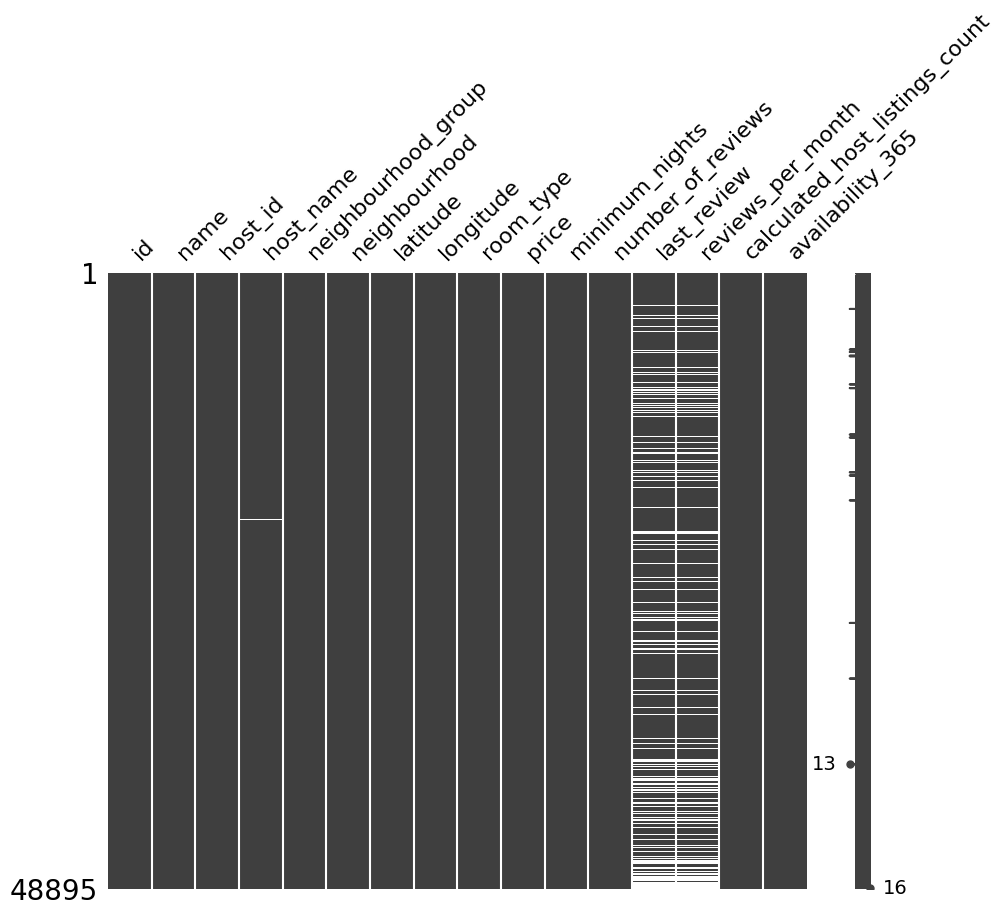

In [7]:
msno.matrix(Airbnb_df, figsize=(10, 8))
plt.show()

Upon reviewing this plot and the isnull cell above, I have identified a substantial number of missing values within the 'last_review' and 'review_per_month' columns. Additionally, there are a few missing values in the 'host_name' and 'name' columns. Therefore, it is prudent to proceed by removing these entries.

I will also proceed to eliminate any columns deemed nonessential to this project's objectives.

In [9]:
Airbnb_df.drop(['id','last_review', 'reviews_per_month', 'name', 'host_name', 'latitude','longitude'], axis=1, inplace= True)


In [10]:
Airbnb_df.describe()

,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


I will now generate visual plots to facilitate a more comprehensive understanding of the data.

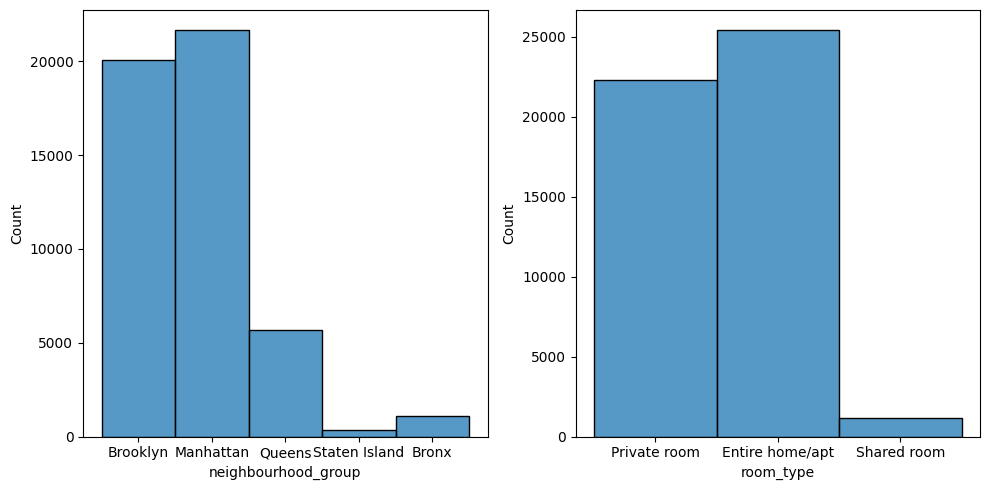

In [62]:
#Categorical

fig, axis = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(ax = axis[0], data = Airbnb_df, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = Airbnb_df, x = "room_type")
plt.tight_layout()
plt.show()

As the plot shows, the neighbourhood_group is highest in Manhattan follow by Brooklyn. Queens, Staten Island and Bronx are clearly below. 
In the second plot, we can see that the highest room type are the entire home/apt and the private room. The shared room is really low in this case. 

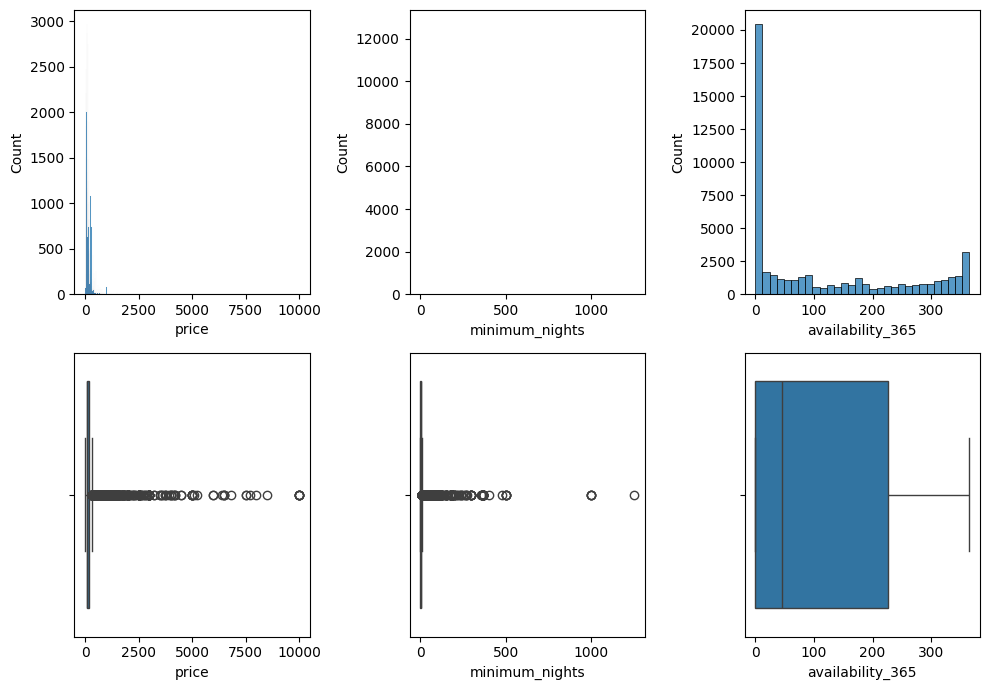

In [49]:
#Numerics
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = Airbnb_df, x = "price")
sns.boxplot(ax = axis[1, 0], data = Airbnb_df, x = "price")
sns.histplot(ax = axis[0, 1], data = Airbnb_df, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = Airbnb_df, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = Airbnb_df, x = "availability_365")
sns.boxplot(ax = axis[1, 2], data = Airbnb_df, x = "availability_365")
plt.tight_layout()
plt.show()

The first plot shows that the price is not a standard range, on the contrary we see all kind of prices, from 10 to 10000. However, is clear that most prices are between 10 and 1000. For the second plot we also have a large range of minimun nights, it goes from 1 to 1200, but nothing too clear. The last plot shows that the availability 365 is in the most of the cases 0, but after that, is really homogeneous in the rest of the data.

<Axes: >

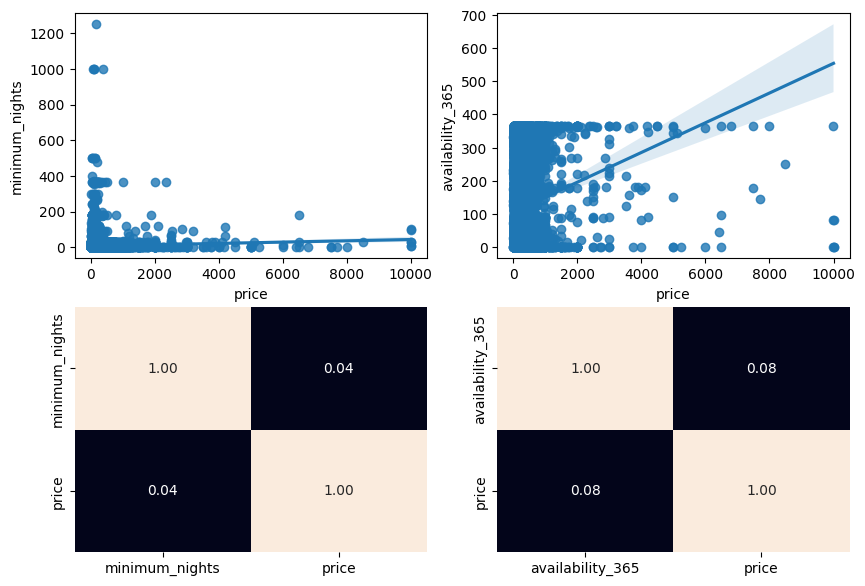

In [50]:
#Numeric-numeric

fig, axis = plt.subplots(2, 2, figsize = (10, 7))
sns.regplot(ax = axis[0, 0], data = Airbnb_df , x = "price", y = "minimum_nights")
sns.heatmap(Arbnb_df[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = Airbnb_df , x = "price", y = "availability_365")
sns.heatmap(Arbnb_df[["availability_365", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
plt.tight_layout()
plt.show()

In this two plots, we can see clearly that there is no correlation between minimum nights and price, neither in availability 365 and price.

<Axes: xlabel='neighbourhood', ylabel='count'>

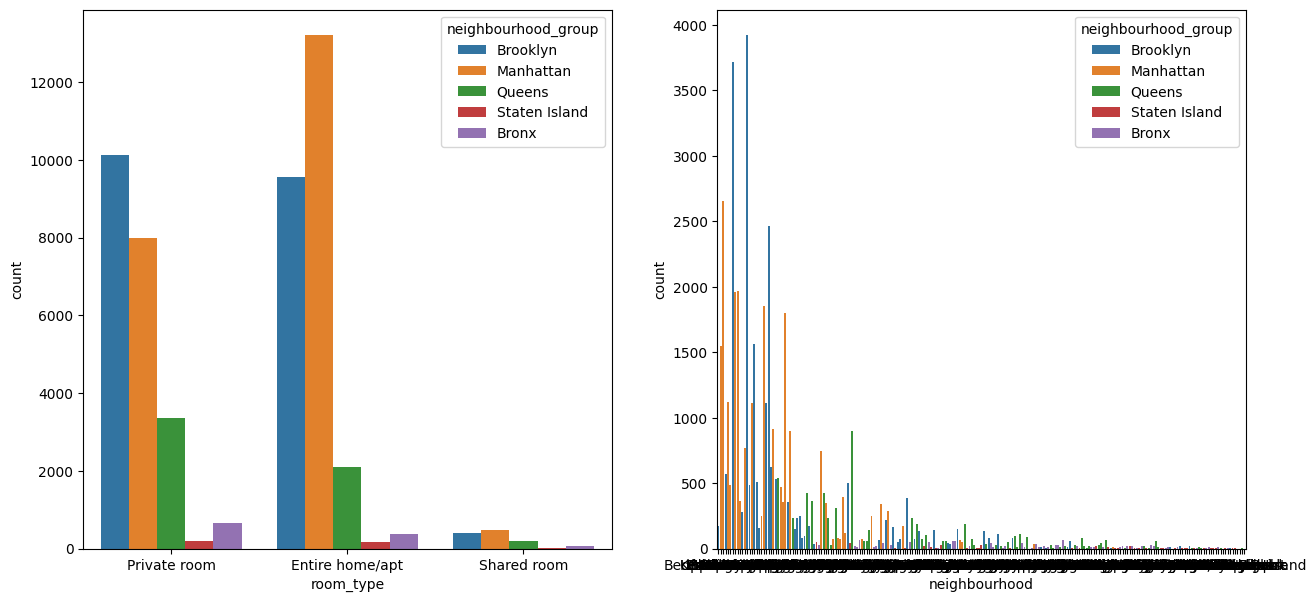

In [51]:
#Categorical-categorical

fig, axis = plt.subplots(1, 2, figsize = (15, 7))
sns.countplot(ax = axis[0], data = Airbnb_df, x = "room_type", hue = "neighbourhood_group")
sns.countplot(ax = axis[1], data = Airbnb_df, x = "neighbourhood", hue = "neighbourhood_group")
plt.tight_layout()
plt.show()

In this plots we can appreciate that Brooklyn is the highest in the room type and even in the neighbourhood, follow by Manhattan in room type and also in neighbourhood.

Now, it's time to factorize the categorical columns (in new columns), in order to generate a correlation heatmap.

In [52]:
#factorize the categorical data

Arbnb_df['room_type_n'] = pd.factorize(Airbnb_df['room_type'])[0]
Arbnb_df['neighbourhood_n'] = pd.factorize(Airbnb_df['neighbourhood'])[0]
Arbnb_df['neighbourhood_group_n'] = pd.factorize(Airbnb_df['neighbourhood_group'])[0]
Arbnb_df.head()


,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_n,neighbourhood_group_n
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365,0,2,1
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194,1,3,0
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0,1,4,1


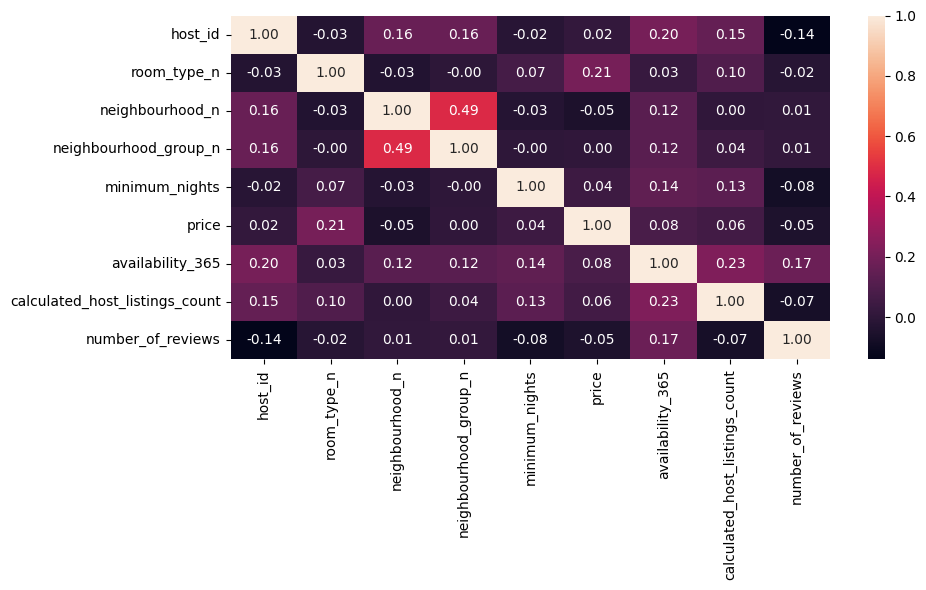

In [53]:
#correlacion

fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(Airbnb_df[["host_id","room_type_n", "neighbourhood_n", "neighbourhood_group_n", "minimum_nights", "price", "availability_365", "calculated_host_listings_count", "number_of_reviews"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()
plt.show()

In this heatmap plot, it's evident that the only items exhibiting correlation are 'neighbourhood' and 'neighbourhood group'. For the remaining items, there appears to be no discernible correlation.

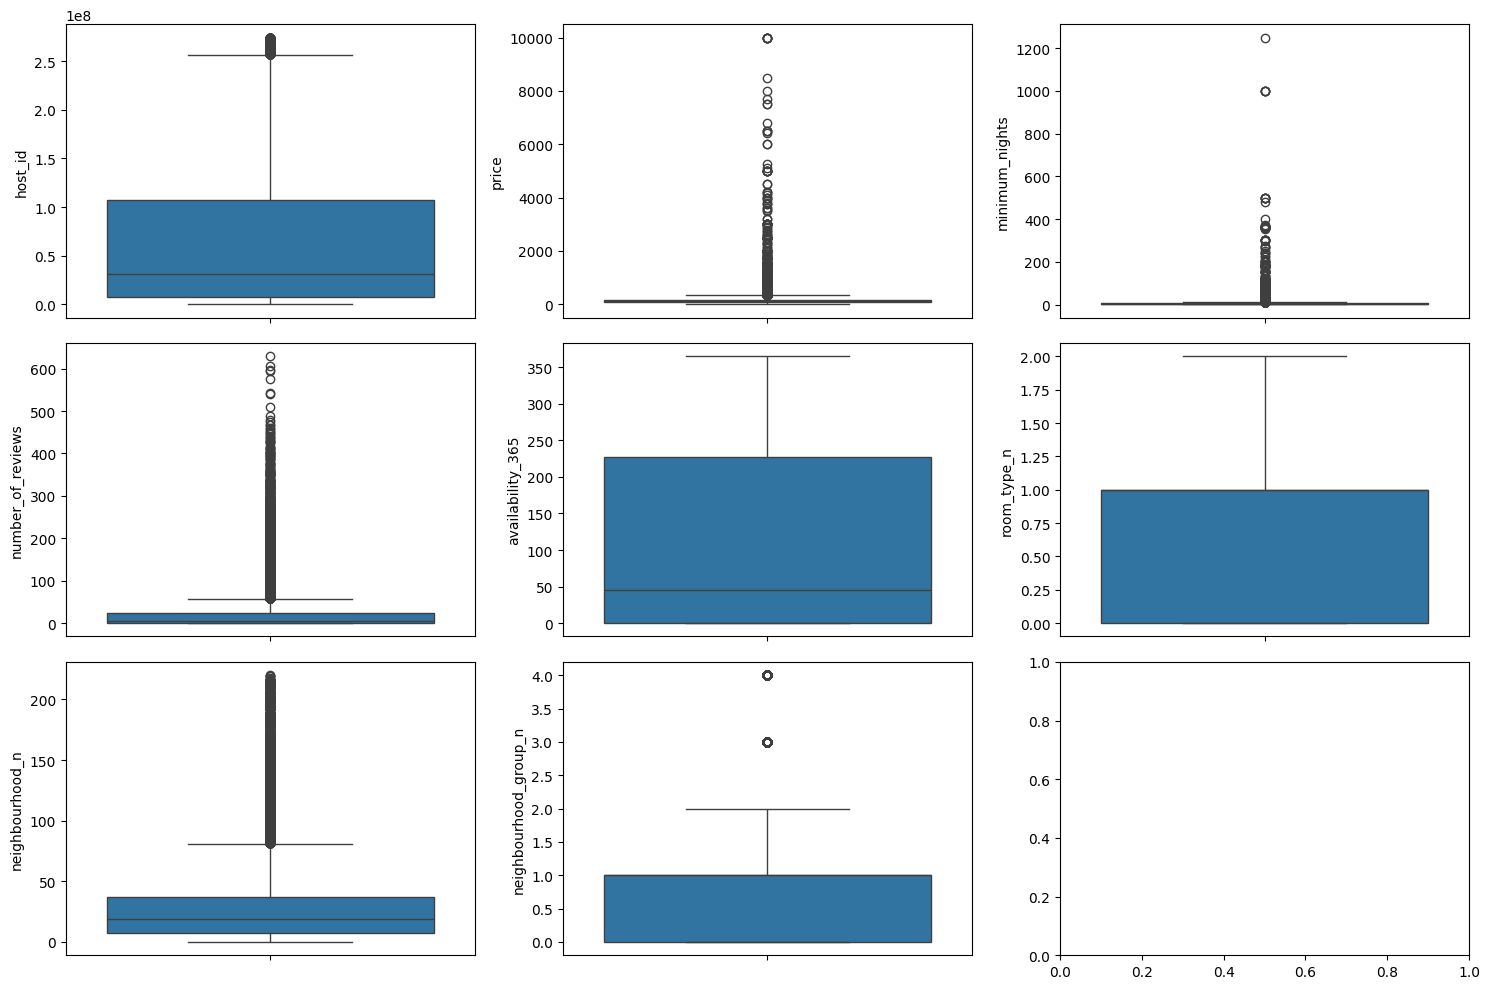

In [55]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = Airbnb_df, y = "host_id")
sns.boxplot(ax = axis[0, 1], data = Airbnb_df, y = "price")
sns.boxplot(ax = axis[0, 2], data = Airbnb_df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 0], data = Airbnb_df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = Airbnb_df, y = "availability_365")
sns.boxplot(ax = axis[1, 2], data = Airbnb_df, y = "room_type_n")
sns.boxplot(ax = axis[2, 0], data = Airbnb_df, y = "neighbourhood_n")
sns.boxplot(ax = axis[2, 1], data = Airbnb_df, y = "neighbourhood_group_n")

plt.tight_layout()

plt.show()

In [56]:
Airbnb_df = Arbnb_df[Airbnb_df['minimum_nights'] < 999 ]
Airbnb_df = Arbnb_df[Airbnb_df['price'] != 0]

print(Airbnb_df.describe())

            host_id         price  minimum_nights  number_of_reviews  \
count  4.887900e+04  48879.000000    48879.000000       48879.000000   
mean   6.762121e+07    152.752920        6.923259          23.273799   
std    7.861612e+07    240.179476       17.567191          44.553153   
min    2.438000e+03     10.000000        1.000000           0.000000   
25%    7.819574e+06     69.000000        1.000000           1.000000   
50%    3.079382e+07    106.000000        3.000000           5.000000   
75%    1.074344e+08    175.000000        5.000000          24.000000   
max    2.743213e+08  10000.000000      500.000000         629.000000   

       calculated_host_listings_count  availability_365   room_type_n  \
count                    48879.000000      48879.000000  48879.000000   
mean                         7.145154        112.762741      0.567074   
std                         32.957823        131.617456      0.541155   
min                          1.000000          0.000000    

In [57]:
num_variables = ["host_id", "room_type_n", "neighbourhood_n", "neighbourhood_group_n", "minimum_nights", "price", "availability_365", "calculated_host_listings_count", "number_of_reviews"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(Airbnb_df[num_variables])

total_data_norm = pd.DataFrame(norm_features, index = Airbnb_df.index, columns = num_variables)
total_data_norm["price"] = Airbnb_df["price"]
total_data_norm.head()


,host_id,room_type_n,neighbourhood_n,neighbourhood_group_n,minimum_nights,price,availability_365,calculated_host_listings_count,number_of_reviews
0,-0.860118,-1.047906,-0.861995,-0.932100,-0.337181,149,1.916462,-0.034746,-0.320380
1,-0.860117,0.800013,-0.833155,0.252295,-0.337181,225,1.840483,-0.156115,0.487652
2,-0.860094,-1.047906,-0.804314,0.252295,-0.223331,150,1.916462,-0.186457,-0.522388
3,-0.860091,0.800013,-0.775473,-0.932100,-0.337181,89,0.617229,-0.186457,5.537851
4,-0.860062,0.800013,-0.746632,0.252295,0.175143,80,-0.856755,-0.186457,-0.320380


In [60]:
num_variables = ["host_id", "room_type_n", "neighbourhood_n", "neighbourhood_group_n", "minimum_nights", "price", "availability_365", "calculated_host_listings_count", "number_of_reviews"]

scaler = MinMaxScaler()

scal_features = scaler.fit_transform(Airbnb_df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = Airbnb_df.index, columns = num_variables)
total_data_scal["price"] = Airbnb_df["price"]
total_data_scal.head()

,host_id,room_type_n,neighbourhood_n,neighbourhood_group_n,minimum_nights,price,availability_365,calculated_host_listings_count,number_of_reviews
0,0.000001,0.0,0.000000,0.00,0.000000,149,1.000000,0.015337,0.014308
1,0.000001,0.5,0.004545,0.25,0.000000,225,0.972603,0.003067,0.071542
2,0.000008,0.0,0.009091,0.25,0.004008,150,1.000000,0.000000,0.000000
3,0.000009,0.5,0.013636,0.00,0.000000,89,0.531507,0.000000,0.429253
4,0.000017,0.5,0.018182,0.25,0.018036,80,0.000000,0.000000,0.014308


In [61]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = total_data_scal.drop("price", axis = 1)
y = total_data_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,host_id,room_type_n,neighbourhood_n,availability_365,calculated_host_listings_count
0,0.009665,0.0,0.009091,0.364384,0.003067
1,0.713228,0.0,0.331818,0.210959,0.000000
2,0.050201,0.5,0.031818,0.939726,0.033742
3,0.917042,0.5,0.031818,0.589041,0.000000
4,0.988022,0.5,0.054545,0.843836,0.000000


In [63]:
X_test_sel.head()

,host_id,room_type_n,neighbourhood_n,availability_365,calculated_host_listings_count
0,0.272603,0.0,0.550000,0.821918,0.000000
1,0.054596,0.5,0.086364,0.000000,0.000000
2,0.788253,0.0,0.095455,0.734247,0.049080
3,0.070359,0.0,0.368182,0.084932,0.110429
4,0.203959,0.5,0.527273,0.098630,0.000000
